Creating an image classification model using deep learning techniques. It assigns label to their content. It shows to preprocess data, build a deep neural network, train the model, and evaluate its performance.

If you are unfamilliar with image classification here's the plot of our notebook: 
1. Data Visualisation
2. Spliting Data
3. Getting Data (using ImageData Generator) & Scaling Data (using ImageData Generator)
4. Building the model
5. Evaluating the model
6. Making Predictions

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt 
# from tensorflow.keras.preprocessing import image
from keras.preprocessing import image

import splitfolders
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# DataFetching

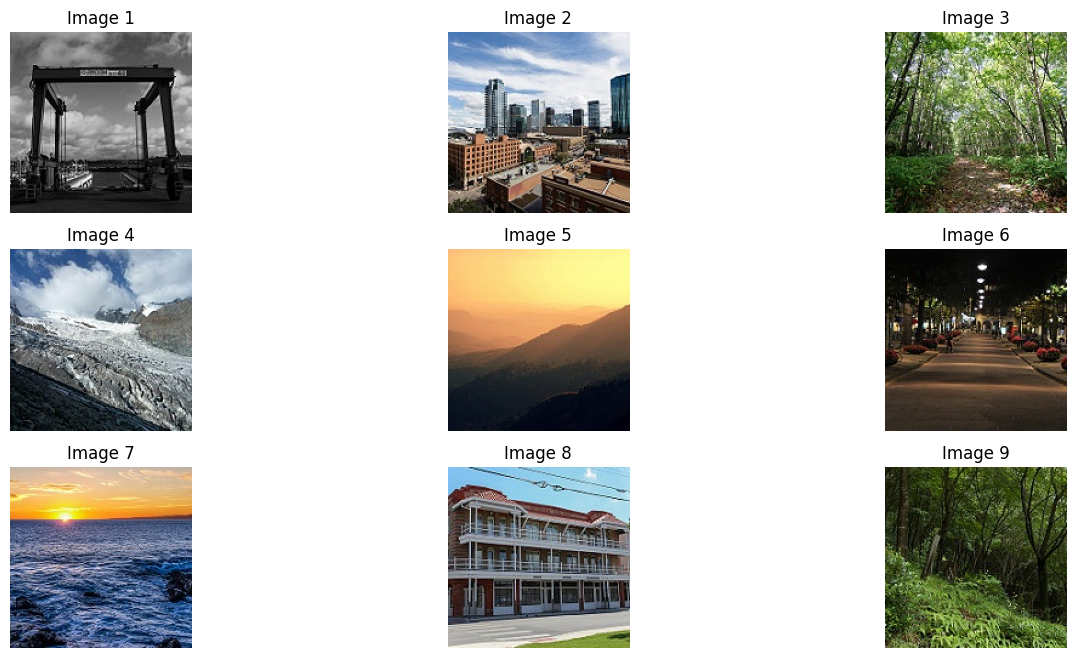

In [2]:
'''
images = ["/kaggle/input/intel-image-classification/seg_train/seg_train/sea/1.jpg",
         "/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/10006.jpg",
         "/kaggle/input/intel-image-classification/seg_train/seg_train/forest/10010.jpg",
         "/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/10003.jpg",
         "/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/10000.jpg",
          "/kaggle/input/intel-image-classification/seg_train/seg_train/street/10015.jpg",
         "/kaggle/input/intel-image-classification/seg_train/seg_train/sea/10071.jpg",
         "/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/1001.jpg",
         "/kaggle/input/intel-image-classification/seg_train/seg_train/forest/10007.jpg"]
'''
images = ["seg_train/sea/1.jpg",
         "seg_train/buildings/10006.jpg",
         "seg_train/forest/10010.jpg",
         "seg_train/glacier/10003.jpg",
         "seg_train/mountain/10000.jpg",
          "seg_train/street/10015.jpg",
         "seg_train/sea/10071.jpg",
         "seg_train/buildings/1001.jpg",
         "seg_train/forest/10007.jpg"]
         
plt.figure(figsize=(16, 8))
for i in range(9):
    img = plt.imread(images[i])
    plt.subplot(3,3, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")  
    plt.axis("off")

## Spliting the data

Since our training data are a set of images distributed accors differents classes in the training folder we can use the splitfloders function which splits a given folder with a ratio chosen. In our case we are going to split the training set into a training and validation 

In [3]:
splitfolders.ratio('seg_train', output="output", seed=1337, ratio=(0.8, 0.2))

Copying files: 14034 files [02:28, 94.74 files/s] 


## Getting Data 

### Scaling 

Use Image Data Generator because it is so effective when dealing with image classification. This function is going to scale our data for us and also augmente the training data by appling some changes like rotation.

In [4]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale = 1.0 / 255)

for this part we are going to use **flow from directory** to capture the images distributed in our 6 classes

In [5]:
train_generator = datagen.flow_from_directory(
    "output/train",
    batch_size = 32,
    target_size = (150,150),
    class_mode = "categorical"
)
validation_generator = test_gen.flow_from_directory(
    "output/val",
    batch_size = 32,
    target_size = (150,150),
    class_mode = "categorical"
)

test_generator = test_gen.flow_from_directory(
        "seg_test",
        target_size=(150, 150),
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

Found 11224 images belonging to 6 classes.
Found 2810 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Building Model 

In [6]:
input_size = 150
model = Sequential([
    Conv2D(input_shape=(input_size,input_size,3),filters = 32,kernel_size=(3,3),padding = 'same',activation='relu'),
    MaxPool2D(),
    
    Conv2D(filters= 64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(),
    
    Conv2D(filters = 64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(),
    
    Conv2D(filters = 128,kernel_size=(3,3),activation='relu',padding = 'same'),
    MaxPool2D(),
    
    Conv2D(filters = 256,kernel_size=(3,3),activation='relu',padding = 'same'),
    MaxPool2D(),
    
    Flatten(name='flatten'),
    Dense(6, activation = 'softmax')
    
])
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [7]:
history = model.fit(train_generator, steps_per_epoch = 11224 // 32,
                    validation_steps = 2810 // 32,
                    epochs = 15,
                    validation_data = validation_generator)

Epoch 1/15
350/350 [==============================] - 246s 701ms/step - loss: 1.1612 - accuracy: 0.5272 - val_loss: 0.9048 - val_accuracy: 0.6559
Epoch 2/15
350/350 [==============================] - 202s 577ms/step - loss: 0.8859 - accuracy: 0.6587 - val_loss: 0.7700 - val_accuracy: 0.7152
Epoch 3/15
350/350 [==============================] - 202s 577ms/step - loss: 0.7824 - accuracy: 0.7065 - val_loss: 0.7187 - val_accuracy: 0.7421
Epoch 4/15
350/350 [==============================] - 227s 649ms/step - loss: 0.6820 - accuracy: 0.7502 - val_loss: 0.6564 - val_accuracy: 0.7705
Epoch 5/15
350/350 [==============================] - 241s 687ms/step - loss: 0.6379 - accuracy: 0.7722 - val_loss: 0.5938 - val_accuracy: 0.7812
Epoch 6/15
350/350 [==============================] - 203s 579ms/step - loss: 0.6099 - accuracy: 0.7784 - val_loss: 0.5979 - val_accuracy: 0.7820
Epoch 7/15
350/350 [==============================] - 200s 571ms/step - loss: 0.5633 - accuracy: 0.7998 - val_loss: 0.5536 -

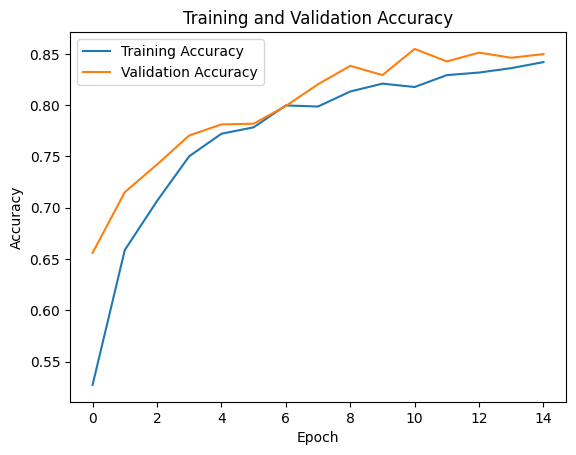

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Evaluating the model

In [9]:
evaluation_results = model.evaluate(test_generator)
print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

3000/3000 [==============================] - 48s 16ms/step - loss: 0.4179 - accuracy: 0.8563
Test Loss: 0.41791215538978577
Test Accuracy: 0.856333315372467


Great News ! Our model achived a 87% accuracy with the test data that he never saw and that's impressive

## Making Predictions

1/1 [==============================] - 0s 37ms/step


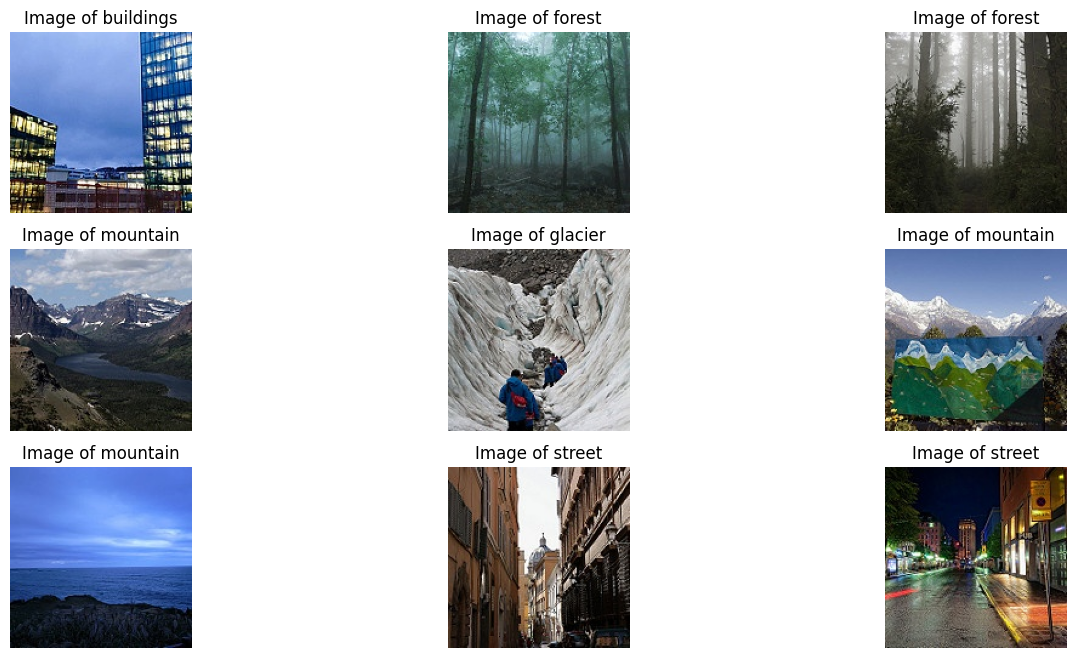

In [10]:
plt.figure(figsize=(16, 8))
'''
imags=["/kaggle/input/intel-image-classification/seg_test/seg_test/buildings/20064.jpg",
      "/kaggle/input/intel-image-classification/seg_test/seg_test/forest/20100.jpg",
      "/kaggle/input/intel-image-classification/seg_test/seg_test/forest/20166.jpg",
      "/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20109.jpg",
      "/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20198.jpg",
       "/kaggle/input/intel-image-classification/seg_test/seg_test/mountain/20071.jpg",
      "/kaggle/input/intel-image-classification/seg_test/seg_test/sea/20081.jpg",
      "/kaggle/input/intel-image-classification/seg_test/seg_test/street/20070.jpg",
       "/kaggle/input/intel-image-classification/seg_test/seg_test/street/20127.jpg"]
'''

imags=["seg_test/buildings/20064.jpg",
      "seg_test/forest/20100.jpg",
      "seg_test/forest/20166.jpg",
      "seg_test/glacier/20109.jpg",
      "seg_test/glacier/20198.jpg",
       "seg_test/mountain/20071.jpg",
      "seg_test/sea/20081.jpg",
      "seg_test/street/20070.jpg",
       "seg_test/street/20127.jpg"]


labels = {0:"buildings",1:"forest",2:"glacier",3:"mountain",4:"sea",5:"street"}
for i in range(9):
    img = image.load_img(imags[i], target_size=(150, 150))
    plt.subplot(3,3, i + 1)
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = model.predict(img_array)
    plt.title(f"Image of {labels[np.argmax(predictions)]}")  
    plt.axis("off")